###                                             AMAZON PRODUCTS & SALES ANALYSIS

### BackGround

In this project I will conduct an in-depth analysis of more than 120,000 products featured on Amazon,
the expansive online retail giant.🛍️ Amazon offers a vast array of items of items from books to electronics, groceries
and anything you can imagine.

In recent years, there has been a noticeable trend of people leveraging Amazon as a platform to generate quick 
and effortless income or to fulfill the aspiration of working from home. 
However, the pivotal question at hand is this: Is selling on Amazon genuinely a profitable endeavor?
    
Well, i dont have the anwers yet, so let dive in 🚀

#### My project will cover the following steps:



1.ETL Process

a.Extract: We'll collect the Amazon products dataset in CSV from Kaggle, chosen Amazon for it relevants in big tech industry.

b. Transformation: Performing data preparation using pandas library. This includes cleaning,preprocesssing and applying necessary transformations to the dataset.


2.🕵️‍♂️ Exploratory data analysis (EDA):conducting an analysis to understand the distribution of products  by categories, customer ratings, and reviews. 

3.📈 Data visualization: Creating visualizations to identify trends and patterns in the dataset.
This involves utilizing charts, graphs, and other visual tools to present insights.


#### About this dataset

1. Category: type of product
2. Size: size of the product
3. Date: date of the sale
4. Status: status of the sale
5. Fulfilment: method of shipment
6. Style: style of the product
7. SKU: stock Keeping Unit
8. ASIN: amazon Standard Identification Number
9. Courier Status: status of the courier
10. Qty: quantity of the product
11. Amount: amount of the sale
12. B2B: Business to business sale
13. Currency: the currency used for the sale
14. Promotion-ids: promotion offer to sellers by Amazon 

## 1. ETL Process

In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from wordcloud import WordCloud, STOPWORDS



In [2]:
custom_palette = ["#1f77b4", "#0094d4","#00a9dd","#6fccea","#c7ebf8","#0065b3"]
sns.set_palette(custom_palette)

In [3]:
pwd

'/Users/mac/Desktop/AMAZON PRODUCT & SALES ANALYSIS'

In [4]:
import os

os.chdir('/Users/mac/Desktop/AMAZON PRODUCT & SALES ANALYSIS/amazon csvs')

In [5]:
df = pd.read_csv('Amazon Sale Report.csv', low_memory= False) 

In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


#### 
Before we dive into the data analysis and visualization, we need to make sure our dataset is clean and properly formatted. This process is called data ETL process, and it involves several steps:

1.1 🔍 Data Inspection: We'll initially examine the dataset for missing values, duplicates, and inconsistencies.
We'll also verify the correctness of data types, ensuring the dataset is well-prepared for analysis.

2.1 🧹 Data Cleaning: then, we'll refine the dataset by rectifying errors, inconsistencies, and removing irrelevant information.  This enhances the dataset's reliability and accuracy.

3.1📏 Data Transformation: after cleaning the dataset, we may need to transform the data to make it more useful for analysis.This can include normalization of data types.

4.1 💾 Data Saving: Once the data is prepared, we'll save it in a new file to preserve the original dataset and provide a safeguard against accidental modifications. This way, we can always go back to the original dataset if we need to.

These steps guarantee a clean, accurate, and analysis-ready dataset! 🚀  

### 1.1 Data Inspection

In [7]:
# count for the number of rows and columns

df.shape

(128975, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

#### Checking for unique values 

In [9]:
df.nunique().to_frame(name='Count of unique values ')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


#### Checking for missing values

In [10]:

# In the last outcome we can see there are some missing values  but let's re confirm

def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print (check_missing_values(df))


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


#### checking for duplicates 

In [11]:
df.duplicated().sum()

0

In [12]:
df[['Status','ship-city','ship-state','ship-postal-code','ship-country']]


,Status,ship-city,ship-state,ship-postal-code,ship-country
0,Cancelled,MUMBAI,MAHARASHTRA,400081.0,IN
1,Shipped - Delivered to Buyer,BENGALURU,KARNATAKA,560085.0,IN
2,Shipped,NAVI MUMBAI,MAHARASHTRA,410210.0,IN
3,Cancelled,PUDUCHERRY,PUDUCHERRY,605008.0,IN
4,Shipped,CHENNAI,TAMIL NADU,600073.0,IN
...,...,...,...,...,...
128970,Shipped,HYDERABAD,TELANGANA,500013.0,IN
128971,Shipped,GURUGRAM,HARYANA,122004.0,IN
128972,Shipped,HYDERABAD,TELANGANA,500049.0,IN
128973,Shipped,Halol,Gujarat,389350.0,IN


In [13]:
##india only has 28 states, theres might be some wrong spelling

df[['ship-city','ship-state']].nunique()


ship-city     8955
ship-state      69
dtype: int64

## 2.1 Data cleaning

### Let's transform Dtype, replace null values or strings for the columns that need it 

#### Amount & Date Columns

In [14]:
## Let's convert INR to USD. I'll use the average exchange rate for 2022, is 0.0127 USD

exchange_rate = 0.0127 

df['Amount']= df['Amount'].apply(lambda x: x * exchange_rate).astype('float64')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,8.224774,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,5.156200,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,4.178300,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,9.567291,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,7.289800,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,6.565900,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,12.687300,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,8.763000,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,15.227300,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [15]:
# Converting the 'Date' column to datetime format and extracting the month and year

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df['Month-Year'] = df['Date'].dt.to_period('M')


In [16]:
## The time period we rely on for our analysis

print(f'The earliest date is {df["Date"].min()}')
print(f'The latest date is {df["Date"].max()}')


The earliest date is 2022-03-31 00:00:00
The latest date is 2022-06-29 00:00:00


#### Ship-state & Ship-city columns

In [17]:
#Let's explore the states. As mentioned India only have 28 states and 8 territories.


df['ship-state'].value_counts()

MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: ship-state, Length: 69, dtype: int64

In [17]:
dict.fromkeys(df['ship-state']) 
list(dict.fromkeys(df['ship-state'])) 

['MAHARASHTRA',
 'KARNATAKA',
 'PUDUCHERRY',
 'TAMIL NADU',
 'UTTAR PRADESH',
 'CHANDIGARH',
 'TELANGANA',
 'ANDHRA PRADESH',
 'RAJASTHAN',
 'DELHI',
 'HARYANA',
 'ASSAM',
 'JHARKHAND',
 'CHHATTISGARH',
 'ODISHA',
 'KERALA',
 'MADHYA PRADESH',
 'WEST BENGAL',
 'NAGALAND',
 'Gujarat',
 'UTTARAKHAND',
 'BIHAR',
 'JAMMU & KASHMIR',
 'PUNJAB',
 'HIMACHAL PRADESH',
 'ARUNACHAL PRADESH',
 'MANIPUR',
 'Goa',
 'MEGHALAYA',
 'GOA',
 'TRIPURA',
 'LADAKH',
 'DADRA AND NAGAR',
 'SIKKIM',
 'Delhi',
 nan,
 'ANDAMAN & NICOBAR ',
 'Punjab',
 'Rajshthan',
 'Manipur',
 'rajasthan',
 'Odisha',
 'NL',
 'Bihar',
 'MIZORAM',
 'punjab',
 'New Delhi',
 'Rajasthan',
 'Punjab/Mohali/Zirakpur',
 'Puducherry',
 'delhi',
 'RJ',
 'Chandigarh',
 'orissa',
 'LAKSHADWEEP',
 'goa',
 'PB',
 'APO',
 'Arunachal Pradesh',
 'AR',
 'Pondicherry',
 'Sikkim',
 'Arunachal pradesh',
 'Nagaland',
 'bihar',
 'Mizoram',
 'rajsthan',
 'Orissa',
 'Rajsthan',
 'Meghalaya']

In [18]:

 my_dict={ 
     'PUDUCHERRY':'TAMIL NADU',
     'DELHI':'NEW DELHI',
     'PUNJAB':'PUNJAB',
     'Goa':'GOA',
     'DADRA AND NAGAR':'GUYARAT',
     'Delhi':'NEW DELHI',
     'Punjab':'PUNJAB',
     'Rajshthan':'RAJASTHAN',
     'Manipur':'MANIPUR',
     'rajasthan':'RAJASTHAN',
     'Odisha':'ODISHA',
     'NL':'NAGALAND',
     'Bihar':'BIHAR',
     'punjab':'PUNJAB',
     'New Delhi':'NEW DELHI',
     'Rajasthan':'RAJASTHAN',
     'Punjab/Mohali/Zirakpur':'PUNJAB',
     'Puducherry':'PUDUCHERRY',
     'delhi':'NEW DELHI',
     'RJ':'RAJASTHAN',
     'Chandigarh':'CHANDIGARH',
     'orissa':'ODISHA',
     'goa':'GOA',
     'PB':'PUNJAB',
     'APO':'ASSAM',
     'Arunachal Pradesh':'ARUNACHAL PRADESH',
     'AR':'ARUNACHAL PRADESH',
     'Pondicherry':'PUDUCHERRY',
     'Sikkim':'SIKKIM',
     'Arunachal pradesh':'ARUNACHAL PRADESH',
     'Nagaland':'NAGALAND',
     'bihar':'BIHAR',
     'Mizoram':'MIZORAM',
     'rajsthan':'RAJASTHAN',
     'Orissa':'ODISHA',
     'Rajsthan':'RAJASTHAN',
     'Meghalaya':'MEGHALAYA',
     'Gujarat':'GUJARAT',
     }

df['ship-state'].replace(my_dict, inplace = True)

    

In [19]:
df['ship-state'].nunique()


36

In [19]:
##Let's if there some misspelling on the states.

df['ship-city'].value_counts()

BENGALURU                                      11217
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: ship-city, Length: 8955, dtype: int64

In [20]:
df['ship-city']=df['ship-city'].str.upper()  #for easy reading i will conver to upper 

#### I will create a dictionary of unique keys and transform it into a list. 
#### This allows us to get the unique cities present in the ship-city column

In [21]:

dict.fromkeys(df['c'])  
list(dict.fromkeys(df['ship-city'])) 

['MUMBAI',
 'BENGALURU',
 'NAVI MUMBAI',
 'PUDUCHERRY',
 'CHENNAI',
 'GHAZIABAD',
 'CHANDIGARH',
 'HYDERABAD',
 'NOIDA',
 'AMRAVATI.',
 'GUNTAKAL',
 'JAIPUR',
 'NEW DELHI',
 'GURGAON',
 'TIRUCHIRAPPALLI',
 'PUNE',
 'TEZPUR',
 'RANCHI',
 'BILASPUR',
 'GUWAHATI',
 'THIRUVARUR',
 'LUCKNOW',
 'VISAKHAPATNAM',
 'JEYPUR',
 'THIRUVANANTHAPURAM',
 'GREATER NOIDA',
 'JABALPUR',
 'KOLKATA',
 'ONGOLE',
 'SECUNDERABAD',
 'KEWALPUR',
 'CUTTACK',
 'BADLAPUR',
 'DIMAPUR',
 'WARANGAL',
 'DHAULPUR',
 'NAGPUR',
 'THANE',
 'DAHOD',
 'VIJAPURA',
 'BANGALORE',
 'BERHAMPUR',
 'HIMMATNAGAR',
 'DEHRADUN',
 'DHARMAPURI',
 'VADODARA',
 'CHAVAKKAD',
 'PATNA',
 'JAMMU',
 'NARNAUND',
 'AHMEDABAD',
 'AMBARNATH',
 'GWALIOR',
 'ROHTAK',
 'RAMAGUNDAM',
 'PITHORAGARH',
 'GUWAHATI, KAMRUP (M)',
 'KOLAR',
 'PATIALA',
 'REWA',
 'BONGAIGAON',
 'CHENGALPATTU',
 'PERAMBALUR',
 'VARANASI',
 'COIMBATORE',
 'CHIRMIRI',
 'AZAMGARH',
 'KALYAN',
 'MYSORE',
 'BARABANKI',
 'AMILA',
 'VIJAYAWADA',
 'RAWAN AMBUJA CEMENT PLANT',
 'HERB

In [22]:
## its seems theres a lot of values that only counts 1. Lets search

count_cities= df['ship-city'].value_counts()
values_equal_1 = count_cities[count_cities == 1]


results_list= values_equal_1.index.to_list()

print(results_list)

['PADOOR', 'KALADY ERNAKULAM DISTRICT', 'GOLIYANGDI', 'TARUN', 'WADHWAN', 'ASIND', ',RAIBARELY ROAD FAIZABAD (AYODHYA)', 'KOTHRUD', 'NOIDANOIDA', 'MELPAKKAM', 'PADUBIDRI', 'PURBA MEDINIPUR', 'MORAZHA', 'UTHUKULI', 'CIP HOSPITAL KANKE Q NO N3 14 RANCHI', 'BARGHAT', 'NEW DELHI-110015', 'YENAMADURRU', 'PALURGADA', 'ARANGOTTUKARA', 'BADNAGAR', 'ERNAKULAM (DT)', 'MUMBAI 40092', 'JUNGA', 'DEVRUKH', 'PODILI', 'JAGADHARI', 'NOIDA, SEC -44', 'RAWALSAR', 'VIJAYANAGARAM', 'SAINIK SCHOOL, THIRUVANANTHAPURAM DISTRICT', 'TOLA MANSARAUT', 'TALCHER THERMAL POWER STATION TOWNSHIP', 'DORAHA, DISTRICT LUDHIANA.', 'AKKALKUWA', 'HAROA', 'AMBEGAON', 'KANHAN', 'MADAPPALLY COLLEGE', 'GANGAPUR', 'BALIKUDA', 'BRAHMAVAR, UDUPI', 'SECTOR 90, MANESAR', 'IFFCO CENSUS VILLAGE', 'CHROMPET, CHENNAI', 'MOHANRAOPET, KORUTLA MANDAL, JAGITYAL DIST', 'SEAWOOD EAST NAVI MUMBAI', 'KALPAKKKAM', 'ROURKELA- 769012', 'AMBARNATH (EAST)', 'JALALPUR', 'NARWANA, JIND', 'DOMBIVLI,KALYAN', 'BADLAPUR (W)', 'ADIPUR', 'NANGLOI', 'MUMBAI 

In [24]:
len(results_list)

3342

In [23]:

my_dict={ 'BENGALURU': 'BANGALORE',
        'AMRAVATI.': 'AMRAVATI',
         'VIJAPURA':'BIJAPUR',
         'GUWAHATI, KAMRUP (M)' :'GUWAHATI',
         'RAWAN AMBUJA CEMENT PLANT':'RAWAN',
         'KOLKATA 700034': 'KOLKATA',
         'NK SWEETS VIKASNAGAR': 'VIKASNAGAR',
         'AMBALA CITY':'AMBALA',
         'RAU':'INDORE',
         'FARIDPUR BAREILLY DISTRICT':'FARIDPUR',
         'KOYILANDY, KOZHIKODE':'KOYILANDY',
         'VIKAS PURI, F BLOCK':'VIKAS PURI',
         'JHUMRI TILAIYA':'JHUMRI TELAIYA',
         'MANDVI KACHCHH DISTRICT':'MANDVI',
         'TUMAKURU. PHONE NUMBER 9686000855':'TUMAKURU',
         'SIPCOT PERUNDURAI':'PERUNDURAI',
         'MALAPPURAM P O':'MALAPPURAM',
         'KANJIKODE INDUSTRIAL AREA':'KANJIKODE',
         'KESHORAI PATAN DISTRICT BUNDI':'KESHORAI',
         'ATCHUTAPURAM APSEZ':'ATCHUTAPURAM',
         'CHINCHWAD ,PUNE':'PUNE',
         'BOKARO STEEL CITY':'BOKARO',
         'ANDUL NEAR MAYA STORES':'KOLKATA',
         'PICHHORE SHIVPURI DISTRICT':'PICHHORE',
         'SIKANDARABAD INDUSTRIAL AREA': 'SIKANDARABAD',
         'CHITTOOR DISTRICT':'CHITTOOR',
         'NEELAKUDI, THIRUVARUR': 'NEELAKUDI',
         'FARIDPUR BAREILLY DISTRICT':'FARIDPUR',
         'ARVI,DIST- WARDHA':'ARVI',
         'MUMBAI 400101':'MUMBAI',
         'MIRZAPUR CUM VINDHYACHAL':'MIRZAPUR',
         'KAMATGI,HUNUGUND TALUK,BAGALKOT DISTRICT':'KAMATGI',
         'THANE (W)':'THANE WEST',
         'SANGAREDDY DISTRICT': 'SANGAREDDY ',
         'NOIDA EXTENSION':'NOIDA',
         'CHAMARAJANAGAR, DISTRICT AND SUBDISTRICT':'CHAMARAJANAGAR',
         'NTPC KANIHA TOWNSHIP':'NTPC KANIHA',
         'SIPCOT THOOTHUKUDI':'THOOTHUKUDI',
         'SAO JOSE DE AREAL':'GOA',
         'AMETHI SULTANPUR DISTRICT':'AMETHI',
         'ARANI TIRUVANNAMALAI DISTRICT':'ARANI',
         'BENGALURU 560037':'BANGALORE',
         'ATMAKUR SRI POTTI SRIRAMULU':'ATMAKUR',
         'MAHRAJGANJ MAHRAJGANJ DISTRICT':'MAHRAJGANJ',
         'NEW TOWN, KOLKATA':'KOLKATA',
         'ALOK CITY':'ALOK',
         'RAI INDUSTRIAL AREA':'RAI',
         'MUMBAI 400101':'MUMBAI',
         'METTUPALAYAM COIMBATORE DISTRICT':'METTUPALAYAM',
         'KANNAMANGALAM ALAPPUZHA DISTRICT':'KANNAMANGALAM',
         'LILUAH,HOWRAH':'HOWRAH',
         'HYDERABAD (500034)':'HYDERABAD',
         'PALLIPPURAM THIRUVANANTHAPURAM DISTRICT':'PALLIPPURAM',
        'TIRUPATHUR SIVAGANGA DISTRICT':'TIRUPATHUR',
        'GUDALUR COIMBATORE DISTRICT':'GUDALUR',
         'KANIYAPURAM, THIRUVANANTHAPURAM DISTRICT':'KANIYAPURAM',
         'MALPUR ROAD, MODASA':'MODASA',
         'MAHADEVAPURA, BANGALORE':'BANGALORE',
         'NUVEM.   ( DO NOT RING THE DOOR BELL, CALL B4 COMG':'NUVEM',
         'FORT.MUMBAI':'MUMBAI',
         'KUNDLI INDUSTRIAL AREA':'KUNDLI',
         'DOBASPET INDUSTRIAL AREA':'DOBASPET',
          'RANIPET, VELLORE DT':'VELLORE',
          'ALANGULAM TIRUNELVELI DISTRICT':'TIRUNELVELI',
          'RAJGARH RAJGARH DISTRICT':'RAJGARH',
          'NARASINGAPURAM VELLORE DISTRICT':'NARASINGAPURAM',
          'JALALABAD SHAHJAHANPUR DISTRICT':'SHAHJAHANPUR',
          'TENALI, GUNTUR DISTRICT':'GUNTUR',
         'ARANI THIRUVALLUR DISTRICT':'THIRUVALLUR',
         'IB THEMAL POWER PLANT BANHARPALI TOWNSHIP':'BANHARPALI TOWNSHIP',
         'COIMBATORE 641041':'COIMBATORE',
          'ALIPORE KOLKATA':'KOLKATA',
          'BHAYANDER (EASY)':'EAST BHAYANDER',
          'NALLASOPARA (EAST)':'EAST NALLASOPARA',
          'INDIRAPURAM, GHAZIABAD':'GHAZIABAD',
          'IRITTY,KANNUR':'KANNUR',
          'NALLASOPARA (EAST)':'EAST NALLASOPARA',
          'PLOT NO.7,SECTOR 47,GURGAON':'GURGAON',
          'ANDHERI EAST, MUMBAI':'EAST MUMBAI',
          'VRINDAVAN, MATHURA':'VRINDAVAN',
          'TANDA AMBEDKAR NAGAR DISTRICT':'TANDA',
          'NANDIKOTKUR KURNOOL':'',
          'TADIGADAPA,VIJAYAWADA':'VIJAYAWADA',
          'BADLAPUR (EAST)':'EAST BADLAPUR',
          'CHENNAI.':'CHENNAI',
          'KANCHIKACHERLA, KRISHNA DISTRICT':'KRISHNA',
          'WAGHOLI, PUNE':'PUNE',
          'MANJERI P.O ':'MANJERI',      
         'DOMBIVLI(E)':'EAST DOMBIVLI',
         'MUMBAI,MALAD WEST,MALVANI.':'MUMBAI WEST',
         'VILAYAT GIDC':'BHARUCH',
         'DIST ALIPURDUAR':'ALIPURDUAR',
         'SIDCUL HARIDWAR':'HARIDWAR',
         'JSW STEEL PLANT TOWNSHIP':'MUMBAI',
         'COLACHAL, KANYA KUMARI DISTRICT':'COLACHAL',
         'ANJUNA BARDEZ GO':'GOA',
         'NEW TOWN, KOLKATA':'KOLKATA',
         'VADUTHALA,KOCHI':'KOCHI',
         'TOWN.BUDHANA VILLAGE. HUSAINPUR KALAN':'BUDHANA',
         'WCL UMRED':'UMRED',
         'BANGALORE, KARNATAKA':'BANGALORE',
         'JOSHI ROAD KAROL BAGH NEW DELHI':'NEW DELHI',
         'RAIGARH MH':'RAIGARH',
         'MAHESWARAM MANDAL':'MAHESWARAM',
         'VIZIANAGARAM A':'VIZIANAGARAM',
         'INDUSTRIAL AREA DEVAKATHIKOPPA AND SIDLIPURA':'SIDLIPURA',
         'KANDIVALI (E), MUMBAI':'MUMBAI',
         'MERTA CITY':'NAGAUR',
         'KAKKANADU.ERNAKULAM':'KAKKANAD',
         'SATTENAPALLI(MD),GUNTUR(DT)':'GUNTUR',
         'BIHTA PATNA DISTRICT':'BIHTA',
         'SOUTH GOA':'GOA',
         'HSIIDC SOHNA':'HARYANA',
         'DERA BASSI INDUSTRIAL AREA':'DERA BASSI',
         'HASSAN (AMAZON ARUN)':' ',
         'MUMBAI DADAR  WEST':'MUMBAI WEST',
         'GANGAPUR CITY':'GANGAPUR',
         'PHANIGIRI ROAD,CHAITANYAPURI,HYDERABAD':'CHAITANYAPURI',
         'NEW DELHI-110075':'NEW DELHI',
         'TIRUPATHUR SIVAGANGA DISTRICT': 'TIRUPATHUR',
         'DHASAI, SHAHAPUR': 'DHASAI',
         'PARASI/ANPARA':'PARASI',
         'BHATNI BAZAR (DEORIA)':'BHATNI BAZAR',
         'NAVI MUMBAI,THANE':'NAVI MUMBAI',
         'ILAYANGUDI, SIVAGANGAI':'lLAYANGUDI',
         'BANASWADI, BENGALURU':'BANGALORE',
         'RAXAUL BAZAR':'RAXAUL',
         'GUNTUR DIST PONNUR':'PONNUR',
         'GAGRET INDUSTRIAL AREA':'GAGRET',
         'BANGALORE NORTH':'BANGALORE',
         'MAHADEVAPURA, BANGALORE':'BANGALORE',
         'RAMAPURAM CHENNAI':'CHENNAI',
         'TITABOR TOWN':'TITABOR',
         'PIMPRI CHINCHWAD PUNE':'PUNE',
         'FATEHPUR FATEHPUR DISTRICT':'FATEHPUR',
         'MUMBAI -400064':'MUMBAI',
         'HINDALCO INDUSTRIES LTD':'NEW DELHI',
         'AVINASHI, TIRUPUR':'TIRUPATHUR',
         'VASAI(WEST)':'VASAI WEST ',
         'VANDIPETTAI, KURUKUPURAM, RASIPURAM, NAMAKKAL':'RASIPURAM',
         'KRISHNA DISTRICT':'KRISHNA',
         'MANDVI SURAT DISTRICT':'SURAT',
         'TUMKUR DISTRICT':'TUMKUR',
         'KOTRA ROAD ,RAIGARH':'RAIGARH',
         'SABBAVARAM,VISAKHAPATNAM':'SABBAVARAM',
         'KRISHNAPUR HUGLI DISTRICT':'KRISHNA',
         'KALACHOWKI MUMBAI':'MUMBAI',
         'P.O.CHIRAKKAL':'KANNUR',
         'SANT KABIRNAGAR.':'KHALILABAD',
         'DOMBIVLI-EAST':'DOMBIVLI',
         'RAJGARH DHAR DISTRICT':'RAJGARH',
         'KANJIKODE INDUSTRIAL AREA':'KANJIKODE',
         'KANDIVALI (W)':'KANDIVALI',
         'MUMBAI 400023':'MUMBAI',
         'NEW DELHIHBJO':'NEW DELHI',
         'MANDI DABWALI':'DABWALI',
         'NADIM TIRUVURU':'TIRUVURU',
         'KONDHWA KHURD 48 .PUNE  411048':'PUNE',
         'POST OFFICE-HARRAWALA, DEHRADUN':'DEHRADUN',
         'RAJOURI GARDEN':'WEST DELHI',
         'MUMBAI-400064':'MUMBAI',
         'NORTH GOA':'GOA',
         'CURTORIM,SOUTH GOA':'GOA',
         'KALYAN - WEST, THANE':'THANE WEST',
         'RAYMOND CHHINDWARA':'CHHINDWARA',
         'NUVEM.   ( DO NOT RING THE DOOR BELL, CALL B4 COMG':'NUVEM',
         'DARYAPUR BANOSA':'DARYAPUR',
         'REIS MAGOS':'GOA',
         'PANDAKASALA CHIRAYINKIZH':'PANDAKASALA',
         'AYYAMPETTAI THANJAVUR DISTRICT':'AYYAMPETTAI',
         'BANKI MONGRA':'KORBA',
         'ANDHERI EAST, MUMBAI':'MUMBAI',
         'NTPC KANIHA TOWNSHIP':'NTPC KANIHA',
         'DOBASPET INDUSTRIAL AREA':'DOBASPET',
        'RANIPET, VELLORE DT':'RANIPET',
        'ALANGULAM TIRUNELVELI DISTRICT':'ALANGULAM',
        'RAJGARH RAJGARH DISTRICT':'RAJGARH',
        'NARASINGAPURAM VELLORE DISTRICT':'NARASINGAPURAM',
        'JALALABAD SHAHJAHANPUR DISTRICT':'JALALABAD',
        'TENALI, GUNTUR DISTRICT':'TENALI',
        'ARANI THIRUVALLUR DISTRICT':'ARANI',
        'IB THEMAL POWER PLANT BANHARPALI TOWNSHIP':'BANHARPALI TOWNSHIP',
        'COIMBATORE 641041':'COIMBATORE',
        'ALIPORE KOLKATA':'KOLKATA',
        'BHAYANDER (EASY)':'EAST BHAYANDER',
        'NALLASOPARA (EAST)':'EAST NALLASOPARA',
        'INDIRAPURAM, GHAZIABAD':'GHAZIABAD',
        'IRITTY,KANNUR':'KANNUR',
        'NALLASOPARA (EAST)':'EAST NALLASOPARA',
        'PLOT NO.7,SECTOR 47,GURGAON':'GURGAON',
        'ANDHERI EAST, MUMBAI':'EAST MUMBAI',
        'VRINDAVAN, MATHURA':'VRINDAVAN',
        'TANDA AMBEDKAR NAGAR DISTRICT':'TANDA',
        'NANDIKOTKUR KURNOOL':'',
        'TADIGADAPA,VIJAYAWADA':'VIJAYAWADA',
        'BADLAPUR (EAST)':'EAST BADLAPUR',
        'CHENNAI.':'CHENNAI',
         'KANCHIKACHERLA, KRISHNA DISTRICT':'KANCHIKACHERLA',
        'WAGHOLI, PUNE':'PUNE',
        'MANJERI P.O ':'MANJERI',
        'DOMBIVALI E':'EAST DOMBIVALI',
        'THANE - WEST':'THANE-WEST',
        'THANE(W), THANE':'THANE-WEST',
         'GANGAPUR CITY':'GANGAPUR',
         'KALYAN E':'EAST KALYAN',
         'VINDHYANAGAR, SINGRAULI':'SINGRAULI',
         'OLD PANVEL, NAVI MUMBAI':'NAVI MUMBAI',
         'KHANAKUL I':'KHANAKUL',
         'PIMPRI CHINCHWAD PUNE':'PUNE',
         'BEHALA, KOLKATA':'KOLKATA',
         'MANGALURU 575008':'MANGALURU',
         'KUKATPALLY, HYDERABAD':'HYDERABAD',
         'MUMBAI 400030':'MUMBAI',
         'KHARGHAR, NAVI MUMBAI':'NAVI MUMBAI',
         'SANPADA SECTOR 1':'SANPADA',
         'BIDHAN NAGAR, KOLKATA':'KOLKATA',
         'DOMBIVLI ( WEST)':'WEST DOMBIVLI',
         'AMRUTHAHALLI, JAKKUR POST':'AMRUTHAHALLI',
         'KALAIYANUR, COIMBATORE':'COIMBATORE',
         'GOREGAON WEST, MUMBAI':'MUMBAI',
         'PEROLE,NILESHWAR P.O, KASARAGOD DISTRICT ':'KERELA',
         'PRAYAGRAJ (ALLAHABAD)':'PRAYAGRAJ',
         'MULUND ( WEST), MUMBAI, PIN 400080':'MUMBAI',
         'WALKESHWAR,MUMBAI':'MUMBAI',
         'NALASOPARA WEST':'WEST NALASOPARA',
         'MUMBAI-400001':'MUMBAI',
         'NIZAMPET VILLAGE, RANGA REDDY DISTRICT, HYDERABAD':'HYDERABAD',
         'THANE:421302':'THANE',
         'MADIPAKAM CHENNAI':'CHENNAI',
         'SAHAR ROAD, ANDHERI-EAST, MUMBAI':'MUMBAI',
         'KANUVAI, COIMBATORE':'COIMBATORE',
         'CHEMBUR EAST, MUMBAI':'MUMBAI',
         'MUMBAI 400 020':'MUMBAI',
         'CHHIBRAMAU,KANNAUJ':'KANNAUJ',
         'ULHASNAGAR 421004':'ULHASNAGAR',
         'REOTI':'BALLIA',
         'GULABPURA, DISTT BHILWARA':'GULABPURA',
         'THNE':'MUMBAI',
         'KIM':'SURAT',
         'EDAPALLY NORTH PO':'KERALA',
         'CHERUPUZHA':'KANNUR',
         'SECTOR-86,FARIDABAD':'FARIDABAD',
         'HEBRI':'UDUPI',
         'SUPANE':'PUNE',
         'DELHI, NCR':'NEW DELHI',
         'CBD BELAPUR , NAVI MUMBAI':' NAVI MUMBAI',
         'ULUBERIA, HOWRAH':'HOWRAH',
         'MADURAI NORTH':'MADURAI',
         'CHERUKUNNU (P.O)':'KANNUR',
         'KAPRAIN':'BUNDI',
         'CALICUT MEDICAL COLLEGE':'KERALA',
         'VALLABHIPUR':'BHAVNAGAR',
         'SABATHU':'SOLAN',
         'ANDAR':'BIHAR',
         'VAISHALI NAGAR NAGPUR':'NAGPUR',
         'BUDHUWARI , KORBA':'KORBA',
         'KOTTAIYUR':'SIVAGANGA',
         'RASAYANI PANVEL':'RAIGAD',
         'NANDIKOTKUR':'NANDYAL',
         'NEW DELHI 110032':'NEW DELHI',
         'CHENANI':'CHENNAI',
         '(VIA CUNCOLIM)QUEPEM':'GOA',
         'NEW DELHI 110016':' NEW DELHI',
         'KURLA EAST MUMBAI':'MUMBAI',
         'HINGNA/NAGPUR': 'NAGPUR',
         'THIRVALLUR DISTRICT':'THIRVALLUR',
         'ARIYALUR D.T':'ARIYALUR',
         'CHIRCH COMPOND':'ALIGARH',
         'SWARUPNAGAR PS':'SWARUPNAGAR',
         'BHANDARA ROAD':'BHANDARA',
         'CUTTACK - 14':'CUTTACK',
         'SOUTH GOA':'GOA',
          'NEW DELHI-59':'NEW DELHI',
          'NELAMANGALA BANGALURU':'BENGALORE',
          'TAL -NEWASA DIST- AHMEDNAGAR':'AHMEDNAGAR',
         'WARANGAL. MOBILE- 7661968333':'WARANGAL',
         'DISTRICT PETLAD 388160':'PETLAD',
         'BANGALORE 560076':'BENGALORE',
        'NATTHUWA WALA':'DEHRADUN',
        'PREMGADH TA. JETPUR':'PREMGADH',
        'MEHAM DISTT. ROHTAK':'ROHTAK',
        'DISTRICT- BALRAMPUR':'BALRAMPUR',
        'THOOTHUKUDI 628008':'THOOTHUKUDI',
         'THOTTADA,KANNUR,670007':'THOOTHUKUDI',
        'NIGADI PUNE':'PUNE',
        'RAIBARELY ROAD FAIZABAD (AYODHYA)':'AYODHYA',    
        'RAVET PUNE':'PUNE',                              
        'MAMBAKKAM, CHINGLEPUT DIST':'MAMBAKKAM',
         ',RAIBARELY ROAD FAIZABAD (AYODHYA)':'AYODHYA',
         'RAMDURG - BELGAVI':'RAMDURG',
         'PUNE-15':'PUNE',
         'KAGHAZNAGAR, 9849771800.':'KAGAZNAGAR',
         'JP NAGAR 8TH PHASE':'NAGAR',
         '116  B. P. M. B SARANI':'SARANI',
         'KOLKATA, INDIA':'KOLKATA',
         'NEW DELHI (NORTH)':'NEW DELHI',
         'VELACHERY,CHENNAI-42':'CHENNAI',      
          'VYARA, TAPI':'VYARA', 
         'VPO RAUNI':'RAUNI',
         'BENGALURU-11':'BENGALORE',
         'AGRA 282005':'AGRA',
         'CBD BELAPUR,NAVI MUMBAI':'NAVI MUMBAI',
         'FORT (MUMBAI)':'MUMBAI',
         'PHILLAUR DIST. JALANDHAR':'JALANDHAR',
         'MUMBAI, POWAI':'MUMBAI',
         '..KATRA':'REASI',
          'NAGERCOIL-4, 629004':'KANNIYAKUMARI',
         'SRISAILAM PROJECT':'ANDHRA PRADESH',
         'DIST. RATNAGIRI. ( MOB. NO. 9860115770 )':'RATNAGIRI',
         'HOSANAGARA(TQ), SHIMOGA(DIST)':'SHIMOGA',
          'RAMANATHAPURAM DIST':'RAMANATHAPURAM',               
          'VELACHERY,CHENNAI-42':'CHENNAI',
          'KOLKATA SOUTH 24 PARAGANA':'KOLKATA',
         'VILLAGE :MUDDAPUR TQ :MUDHOL DIST :BAGALKOT':'KARNATAKA',
         'RAMGARH CANTONMENT TOWNSHIP': 'RAMGARH',
         'MUMBAI,MAHARASHTRA,400081.0':'MUMBAI',
         'NARASARAOPET GUNTUR DISTRICT':'GUNTUR',
         'NEW DELHIDE':'NEW DELHI',
         'KUNDRATHUR CHENNAI ':'KUNDRATHUR',
         'PONNAMARAVATHI, PUDUKOTTAI DISTRICT':'PONNAMARAVATHI',
         'HIRAPUR':'BALAGHAT',
         'THUNDALAM, CHENNAI':'CHENNAI',
         'BILASPUR,':'BILASPUR',
         'KOTHAPALLE, E.G.DT':'EAST GODAVARI',
         'BANGLURU':'BENGALORE',
         'WAZIRGANJ,BADAUN':'BADAUN',                                    
       'VILLAGE CHALLAH P.O GUTKAR': 'GUTKAR',
         'BAGH AMBERPET,HYDERABAD': 'HYDERABAD',
         'KARUR(DT)':'KARUR',
         'BEHIND GANESH TEMPLE, CIVIL LINE, CHANDRAPUR':'CHANDRAPUR',
         'OWE GAON, KHARGHAR, NAVI MUMBAI':'NAVI MUMBAI',
         '(VIA CUNCOLIM)QUEPEM,SOUTH GOA':'GOA'
       
         
         
         
    
    
         
        }

df['ship-city'].replace(my_dict, inplace = True)


In [24]:
df['ship-city']=df['ship-city'].str.upper() 

In [25]:
df['ship-city'].value_counts().sort_values(ascending=False)

BANGALORE          13279
HYDERABAD           9139
MUMBAI              7176
NEW DELHI           6357
CHENNAI             6294
                   ...  
SHELAR BHIWANDI        1
KARANPUR               1
AMALSAD                1
SULTANPUR LODHI        1
MAMBAKKAM              1
Name: ship-city, Length: 7083, dtype: int64

###
Before cleaning 'ship-city' we had 8955. It contained values from countryside values to the name of the shop who made the purcharse. After correcting misspelling mistakes, it reduces to 7083. I covered this cleaning stage of the 
ship-city list on excell

#### Status & Courier Status Columns

In [26]:
#checking for unique values

df['Status' ].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [27]:


df['Status']= df['Status'].str.replace('Shipped - Delivered to Buyer','Shipped')
df['Status']= df['Status'].str.replace('Shipped - Returned to Seller','Returned')
df['Status']= df['Status'].str.replace('Shipped - Rejected by Buyer','Returned')
df['Status']= df['Status'].str.replace('Shipped - Lost in Transit','Lost in Transit')
df['Status']= df['Status'].str.replace('Shipped - Out for Delivery','Shipped')
df['Status']= df['Status'].str.replace('Shipped - Returning to Seller','Returned')
df['Status']= df['Status'].str.replace('Shipped - Picked Up','Shipped')
df['Status']= df['Status'].str.replace('Pending - Waiting for Pick Up','Pending')
df['Status']= df['Status'].str.replace('Shipped - Damaged','Returned')
df['Status']= df['Status'].str.replace('Shipping','Shipped')


In [28]:
df['Status' ].unique()

array(['Cancelled', 'Shipped', 'Returned', 'Lost in Transit', 'Pending'],
      dtype=object)

In [29]:
#checking for null values

df['Status' ].isnull().sum()

0

In [30]:
df['Courier Status' ].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

###
The 'courier status' column indicate the current condition of the shipment. 
The choices 'Shipped,' 'Unshipped,' and 'Cancelled'represent distinct phases in the shipping procedure.
In the absence of any other statuses as NaN, it implies that the missing values (NaN) might possibly indicate a
status that was either not recorded or is unknown at the time of data collection. 
I will replaced the Nan values as 'Unkown'

In [31]:
df['Courier Status'].fillna("Unknown", inplace= True)

In [32]:
df['Courier Status'].unique()

array(['Unknown', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [33]:
df['Courier Status'].isnull().sum()

0

#### Currency & dropping some columns

In [34]:
df['currency' ].unique()

array(['INR', nan], dtype=object)

In [35]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [36]:
df['ship-country'].unique()

array(['IN', nan], dtype=object)

 ###
 I will delete the currency column wich contain string values because we already transformed the amount column into dollars currency $. As wel as 'the ship-country' column wich countain the country code,due to the analysis is currently based in India. Finally, after checking on null values for 'Unnamed: 22' column, it only have 2 values: nan & false. Also, the does not have a clear description or purpose, so it likely wont provide any value to the analysis.
With this in mind, the most practical is to remove this 3 columns from the dataset.
 

In [37]:
df.drop(columns=['currency','ship-country','Unnamed: 22'], inplace= True)
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B', 'fulfilled-by',
       'Month-Year'],
      dtype='object')


#### Amount column

In [38]:
df['Amount'].isnull().sum()

7795

In [39]:
#Lets check if the null values from the Amount column is related with cancelled orders 

print(df.groupby('Status')
['Amount'].value_counts(dropna=False))

Status     Amount   
Cancelled  NaN          7566
           5.067300      311
           4.826000      245
           9.325483      222
           8.890000      189
                        ... 
Shipped    36.372800       1
           36.753800       1
           38.557200       1
           69.786500       1
           70.916800       1
Name: Amount, Length: 2543, dtype: int64


In [40]:
df.query('Status == "Cancelled"')  

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,fulfilled-by,Month-Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Unknown,0,8.224774,MUMBAI,MAHARASHTRA,400081.0,NaN,False,Easy Ship,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Unknown,0,9.567291,PUDUCHERRY,TAMIL NADU,605008.0,NaN,False,Easy Ship,2022-04
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,2022-04
23,23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,...,Unknown,0,7.245096,PUNE,MAHARASHTRA,411044.0,NaN,False,Easy Ship,2022-04
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,Unknown,0,NaN,GUWAHATI,ASSAM,781003.0,NaN,False,Easy Ship,2022-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128961,128961,402-0082204-6323568,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,...,Unshipped,1,9.791700,JUNAGADH,GUJARAT,362001.0,NaN,False,NaN,2022-05
128962,128962,408-9803724-6565965,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,kurta,...,Unshipped,1,8.445500,MUMBAI,MAHARASHTRA,400056.0,NaN,False,NaN,2022-05
128965,128965,408-5154281-4593912,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,...,Unshipped,1,7.289800,PRAYAGRAJ,UTTAR PRADESH,211007.0,NaN,False,NaN,2022-05
128967,128967,404-5182288-1653947,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,...,Cancelled,0,NaN,KOLKATA,WEST BENGAL,700040.0,NaN,False,NaN,2022-05


###
The orders cancelled are not directly related with the amount column, because there're others shippement that do have the quantity of the purcharse. Bsed on this, we can assume there has been a mistake in the system. I will replace the NaN values with 0. 


In [41]:
df['Amount'].fillna("0", inplace= True)

In [42]:
df['Amount'].isnull().sum()

0

### B2B Column

In [43]:
df['B2B'].isnull().sum()

0

In [44]:
df['B2B'].unique()

array([False,  True])

####
B2B means selling business to business. This column has boolean types, this mean when the value is False this mean
the buyer is a customer and when the value is True the buyer is a business. I will replace this value with business &
customer consequently.

In [45]:
df['B2B'].replace(to_replace=[True,False], value=['business','customer'], inplace= True)

In [46]:
df['B2B'].unique()

array(['customer', 'business'], dtype=object)

### Promotion-ids & Fulfilled-by Column

In [47]:
df['promotion-ids'].isnull().sum()

49153

In [48]:
df['promotion-ids'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

###
The promotion-ids named 'Amazon PLCC Free-Financing Universal Merchant' or 'IN Core Free Shipping' are the
two promotions available for sellers. From the list array before is only changed the numbers associated to those 
promotions.These promos are free shipping based on a min pay/ purcharse. These are reimbursed to the seller 
by Amazon within the same payout period, and so are not counted against their profitability. 

So based on this analysis we can deduce that the null values means there is no promotion applied to that purcharse. 

In [49]:
df['promotion-ids'].fillna('No promotion', inplace= True)

In [50]:
df['promotion-ids'].isnull().sum()

0

In [51]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

####

Easy Ship is an Amazon courier service and functions as a delivery service tailored for Amazon.in sellers.
By opting for Amazon Easy Ship, the orders undergo pickup from the designated location of the seller by a delivery 
associate from Amazon Logistics right to the buyers doorstep.

So the Nan values mean the seller is using their own courier services. I will replace those values with 'External Ship'

In [52]:
df['fulfilled-by'].fillna('External Ship', inplace= True)

In [53]:
df['fulfilled-by'].unique()

array(['Easy Ship', 'External Ship'], dtype=object)

In [54]:
df['fulfilled-by'].isnull().sum()

0

#### Ship-city, Ship-state, ship-postal-code  Columns

###
Even though, i cover this columns separatelly before i did not cover the null values. I realize there are the same
null values = 33 for the same 3 columns, so i want to investigate if this null values belongs to the same rows.

In [55]:
missing_address_info = df[df['ship-city'].isnull() & df['ship-state'].isnull() & df['ship-postal-code'].isnull()]

print(missing_address_info)

         index             Order ID       Date     Status Fulfilment  \
1871      1871  404-0566904-4825137 2022-04-29    Shipped     Amazon   
1872      1872  404-0566904-4825137 2022-04-29    Shipped     Amazon   
8752      8752  406-4003386-8768363 2022-04-25    Shipped     Amazon   
11215    11215  402-0107720-7057168 2022-04-23    Shipped     Amazon   
13252    13252  407-4532637-8415521 2022-04-22  Cancelled   Merchant   
15688    15688  404-9229894-8608305 2022-04-21    Shipped     Amazon   
16787    16787  402-4919636-4333150 2022-04-20    Shipped   Merchant   
18351    18351  405-4927647-8064368 2022-04-19    Shipped     Amazon   
22930    22930  402-8628677-0457954 2022-04-16   Returned   Merchant   
24986    24986  406-4079063-8291520 2022-04-15  Cancelled     Amazon   
30379    30379  404-7506843-7913132 2022-04-12    Shipped   Merchant   
37963    37963  407-3064376-9158743 2022-04-08  Cancelled   Merchant   
37964    37964  407-3064376-9158743 2022-04-08  Cancelled   Merc

###
Upon examining the rows with missing address information, it becomes evident that there are additional columns 
containing complete data. Recognizing the value of the information in these rows for analysis, I have decided to 
retain them. To maintain the integrity of the dataset, I will fill the null values with 'unknown.' 
This approach ensures that we preserve the integrity of the dataset while incorporating necessary
information for our analysis.


In [56]:
df['ship-city'].fillna('Unknown', inplace= True)
df['ship-state'].fillna('Unknown', inplace= True)
df['ship-postal-code'].fillna('Unknown', inplace= True)


In [57]:
missing_address_info = df[df['ship-city'].isnull() & df['ship-state'].isnull() & df['ship-postal-code'].isnull()]

print(missing_address_info)

Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, ASIN, Courier Status, Qty, Amount, ship-city, ship-state, ship-postal-code, promotion-ids, B2B, fulfilled-by, Month-Year]
Index: []

[0 rows x 22 columns]


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

In [59]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

#### Standarizing the string values of the head of the column

In [61]:
df.columns = [col.strip().replace("-", "_").lower() for col in df.columns]


In [62]:
df

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,courier status,qty,amount,ship_city,ship_state,ship_postal_code,promotion_ids,b2b,fulfilled_by,month_year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Unknown,0,8.224774,MUMBAI,MAHARASHTRA,400081.0,No promotion,customer,Easy Ship,2022-04
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,5.156200,BANGALORE,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,customer,Easy Ship,2022-04
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,4.178300,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,External Ship,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Unknown,0,9.567291,PUDUCHERRY,TAMIL NADU,605008.0,No promotion,customer,Easy Ship,2022-04
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,7.289800,CHENNAI,TAMIL NADU,600073.0,No promotion,customer,External Ship,2022-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,Shipped,1,6.565900,HYDERABAD,TELANGANA,500013.0,No promotion,customer,External Ship,2022-05
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,Shipped,1,12.687300,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,External Ship,2022-05
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,Shipped,1,8.763000,HYDERABAD,TELANGANA,500049.0,No promotion,customer,External Ship,2022-05
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,Shipped,1,15.227300,HALOL,GUJARAT,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,External Ship,2022-05


#### Converting object type to categorical columns

In [63]:
categorical_columns = ['status', 'fulfilment', 'sales channel',
'ship_service_level',
'courier status', 
 'ship_city',                      
  'ship_state',                    
'promotion_ids',
'b2b',
'style', 'category', 'size',
'fulfilled_by']
for column in categorical_columns:
    df[column] = df[column].astype('category')
print(df.dtypes)

index                          int64
order id                      object
date                  datetime64[ns]
status                      category
fulfilment                  category
sales channel               category
ship_service_level          category
style                       category
sku                           object
category                    category
size                        category
asin                          object
courier status              category
qty                            int64
amount                       float64
ship_city                   category
ship_state                  category
ship_postal_code              object
promotion_ids               category
b2b                         category
fulfilled_by                category
month_year                 period[M]
dtype: object


#### Quantity Column

In [64]:
df['qty'].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8])

In [65]:
## I will create an additional column name total sales and is based on "amount * quantity"

df['total_sales'] = df['qty'] * df['amount']


In [66]:
df

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,qty,amount,ship_city,ship_state,ship_postal_code,promotion_ids,b2b,fulfilled_by,month_year,total_sales
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,8.224774,MUMBAI,MAHARASHTRA,400081.0,No promotion,customer,Easy Ship,2022-04,0.0000
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,5.156200,BANGALORE,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,customer,Easy Ship,2022-04,5.1562
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,4.178300,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,External Ship,2022-04,4.1783
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,9.567291,PUDUCHERRY,TAMIL NADU,605008.0,No promotion,customer,Easy Ship,2022-04,0.0000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,7.289800,CHENNAI,TAMIL NADU,600073.0,No promotion,customer,External Ship,2022-04,7.2898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,6.565900,HYDERABAD,TELANGANA,500013.0,No promotion,customer,External Ship,2022-05,6.5659
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,12.687300,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,External Ship,2022-05,12.6873
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,8.763000,HYDERABAD,TELANGANA,500049.0,No promotion,customer,External Ship,2022-05,8.7630
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,15.227300,HALOL,GUJARAT,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,External Ship,2022-05,15.2273


In [71]:
df.duplicated().sum() #before saving the cvs let's check if there are duplicates 

0

In [67]:
df1=df[['order id','date','status','fulfilment','sales channel','ship_service_level','style','sku','category',
        'size','asin','courier status','qty','amount','ship_city','ship_state','ship_postal_code','promotion_ids','b2b','fulfilled_by',
        'month_year','total_sales']]

In [68]:
df1.to_csv('Cleaned_Amazon_products_sales_Report.csv', index=False)


## 2. Exploratory Data Analysis (EDA) + Visualization

### At this stage , i will cover the following KPI'S

 #### Web Traffic 
    
    1. What is the average of items sold per order?
    2. How often does b2b & customer return to place an order?

#### Promotion/ payment behavior
    

    1.What is the distribution of orders with and without promotion?
    2.How many orders with promotions were cancelled?
    3.are customers more likely to buy a product when there is a promotion discount?
    
#### Product 
    
    1.What are the best-selling products?
    2. What is the distribution of sizes?
    3.How likely is a client to buy an item with quantity more than 1?
   
    
#### Delivery 
    
    1. What is the distribution in (Fulfilment, Status)
    2. Likelihood of Orders to be Canceled in Different Categories
    
#### Business to business / Customer Lifetime Value (CLV)

    1.How many orders are made by B2B?
    2.What is the average transaction amount per B2B customer?
    

#### Location/ Customer segmentation

    1. Identify the total Sales by State 
    2. Top States  with Highest Sales
    3. Is there any correlation between States with the quantity sold?


#### Revenue

    1. How many items(qty) were sold per  month?
    2. How much did amazon earn per  month / monthly sales distribution?
    3. Identify the overall Sales Performance
    4. What is the distribution of transaction_amount?
    5. What is the average transaction amount by Segment (Customer)?
    6. Analyze the correlation between the price of the product and the quantity sold.
    


### Web Traffic

In [69]:
# 1. What is the average of items sold per order?


df1.groupby('order id')['qty'].sum().mean()

0.9690225788765389

In [70]:
# 2. How often does b2b & customer return to place an order?

# Sorting the values by user and date

df1.sort_values(['b2b', 'date'], inplace=True)

# Calculating the time difference between consecutive orders for each user

df1['time_since_last_order'] = df1.groupby('b2b')['date'].diff()

# Filtering only rows with the same user to get the time between consecutive orders

returning_users_data = df1[df1['b2b'].eq(df1['b2b'].shift(1))]

# Calculating the average time between consecutive orders for each user

average_time_between_orders = returning_users_data.groupby('b2b')['time_since_last_order'].mean()

# result

print(average_time_between_orders)


b2b
business   0 days 02:27:18.620689655
customer   0 days 00:01:00.701154539
Name: time_since_last_order, dtype: timedelta64[ns]


/var/folders/7k/fzl9cvvd65d33d4pbghcq6n40000gn/T/ipykernel_93527/346734490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(['b2b', 'date'], inplace=True)


### Promotion/ payment behavior

In [71]:
## 1.What is the distribution of orders with and without promotion?
    
#Group by promotion_ids and count the occurrences
promotion_counts = df1['promotion_ids'].value_counts()

# Convert the result to a DataFrame
most_popular_promotions = promotion_counts.reset_index()
most_popular_promotions.columns = ['promotion_ids', 'count']

# Display the most popular promotions
print("Most Popular Promotions:")
print(most_popular_promotions.head(6))  # Change '5' to the desired number of top promotions

Most Popular Promotions:
                                       promotion_ids  count
0                                       No promotion  49153
1       IN Core Free Shipping 2015/04/08 23-48-5-108  46100
2            Duplicated A12RHGVGRWOT3S 1560498941486    489
3  Amazon PLCC Free-Financing Universal Merchant ...    458
4             Duplicated AYTJSBA8ZOP16 1567159860988    433
5  Amazon PLCC Free-Financing Universal Merchant ...    316


In [72]:
# 2.How many orders with promotions were cancelled?

# 
Orders_cancelled_with_promotion = df1[df1['status'] == 'cancelled'].groupby('promotion_ids').size().reset_index(name='Orders_cancelled_with_promotion')

# result
print("Orders_cancelled_with_promotion:")
print(Orders_cancelled_with_promotion)


Orders_cancelled_with_promotion:
                                          promotion_ids  \
0     Amazon PLCC Free-Financing Universal Merchant ...   
1     Amazon PLCC Free-Financing Universal Merchant ...   
2     Amazon PLCC Free-Financing Universal Merchant ...   
3     Amazon PLCC Free-Financing Universal Merchant ...   
4     Amazon PLCC Free-Financing Universal Merchant ...   
...                                                 ...   
5783                          VPC-44571-41445527 Coupon   
5784                          VPC-44571-41445561 Coupon   
5785                          VPC-44571-44201687 Coupon   
5786                          VPC-44571-44201770 Coupon   
5787                          VPC-44571-44201853 Coupon   

      Orders_cancelled_with_promotion  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...               

In [73]:
#calculo del porcentaje de cancelaciones sobre el 

total_order = df1['qty'].sum()
print(total_order )

116649


In [79]:
porcentaje_cancelaciones = (5788/116649) * 100
print(porcentaje_cancelaciones)

4.9618942296976405


In [78]:
#3.Are customers more likely to buy a product when there is a promotion discount?

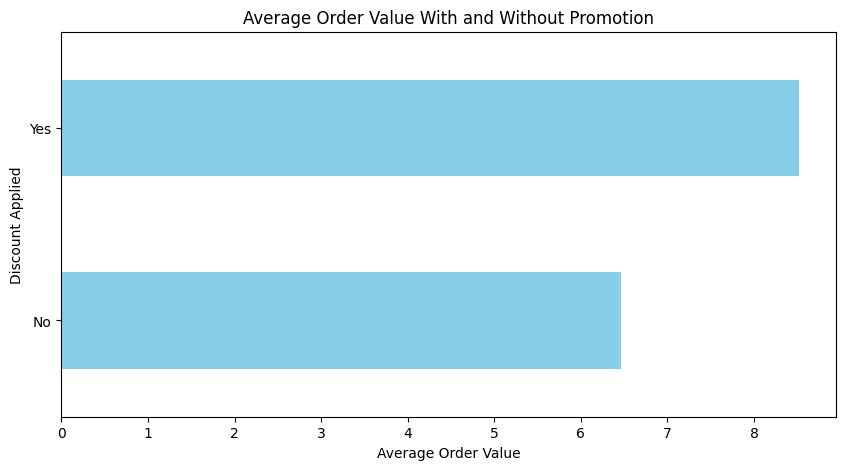

In [74]:

#excluding 'No promotion' for y= label

df1['discount_applied']= df1['promotion_ids'] != 'No promotion'

#calculating the average order value with and without promotion applied 

promotion_order_value= df1.groupby('discount_applied') ['amount'].mean()


plt.figure(figsize=(10, 5))
promotion_order_value.plot(kind='barh', title='Average Order Value With and Without Promotion',color='skyblue')
plt.ylabel('Discount Applied')
plt.xlabel('Average Order Value')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

### Product

In [75]:
#1.What are the best-selling products?

#Top category by quantity sold 

category_sum = df1.groupby('category')['qty'].sum().sort_values(ascending=False)
print(category_sum )

category
Set              45289
kurta            45045
Western Dress    13943
Top               9903
Ethnic Dress      1053
Blouse             863
Bottom             398
Saree              152
Dupatta              3
Name: qty, dtype: int64


In [76]:
#1.1top category by amount -Sales

category_amount = df1.groupby('category')['amount'].sum().sort_values(ascending=False)
print(category_amount )

category
Set              497892.375181
kurta            270504.243090
Western Dress    142444.123163
Top               67916.962210
Ethnic Dress      10048.464282
Blouse             5821.783886
Bottom             1913.483346
Saree              1573.958752
Dupatta              11.620500
Name: amount, dtype: float64


In [77]:
#1.2 Tops products by quantity sold

top_skus_by_quantity_sold = df1.groupby('sku')['qty'].sum().sort_values(ascending=False)
print(top_skus_by_quantity_sold)

sku
JNE3797-KR-L     661
JNE3797-KR-M     561
JNE3797-KR-S     503
JNE3405-KR-L     485
J0230-SKD-M      468
                ... 
JNE3284-KR-XL      0
SAR060             0
JNE3483-KR-M       0
J0323-CD-M         0
BTM027-NP-L        0
Name: qty, Length: 7195, dtype: int64


In [78]:
#1.3 Top products by quantity sold in each category

top_sku_by_quantity_sold_category = df1.groupby(['sku', 'category'])['qty'].sum().reset_index()
top_sku_by_quantity_sold_category = top_sku_by_quantity_sold_category.sort_values(by='qty',ascending= False)
print(top_sku_by_quantity_sold_category)


                   sku       category  qty
40939     JNE3797-KR-L  Western Dress  661
40948     JNE3797-KR-M  Western Dress  561
40957     JNE3797-KR-S  Western Dress  503
24722     JNE3405-KR-L          kurta  485
12119      J0230-SKD-M            Set  468
...                ...            ...  ...
22842  JNE3323-KR-XXXL         Blouse    0
22843  JNE3323-KR-XXXL         Bottom    0
22844  JNE3323-KR-XXXL        Dupatta    0
22845  JNE3323-KR-XXXL   Ethnic Dress    0
64754   SET462-KR-NP-S          kurta    0

[64755 rows x 3 columns]


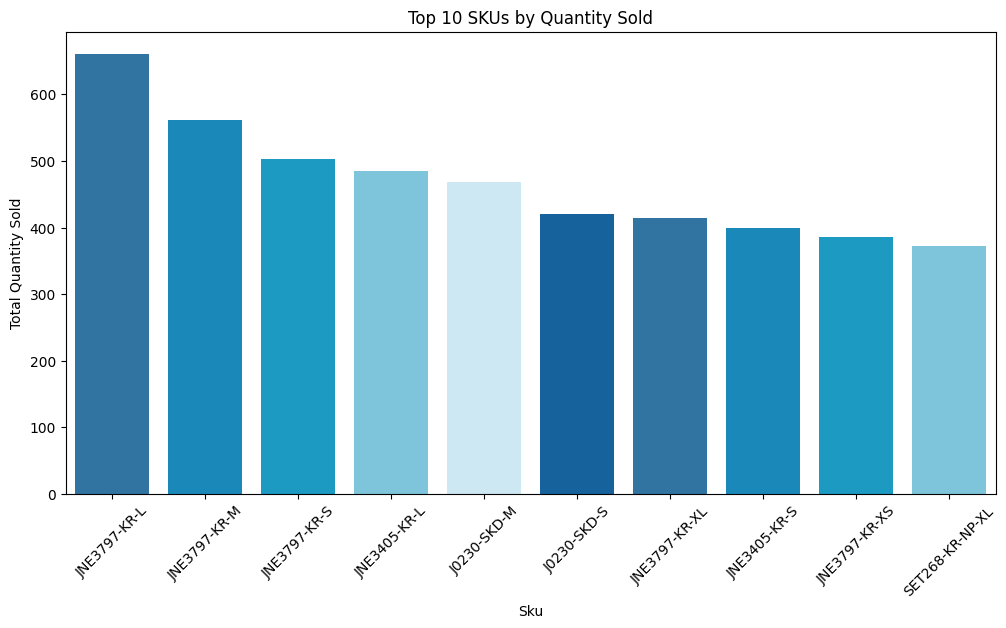

In [79]:
top_skus = df1.groupby('sku')['qty'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skus.index, y=top_skus.values, palette=custom_palette)
plt.title('Top 10 SKUs by Quantity Sold')
plt.xlabel('Sku')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

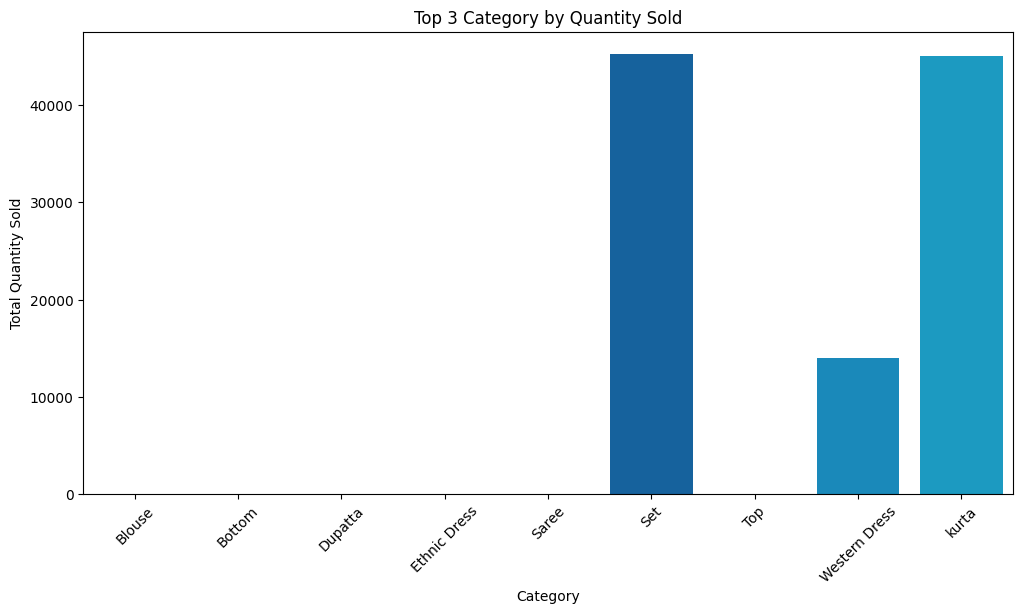

In [80]:
top_category = df1.groupby('category')['qty'].sum().nlargest(3)
top_category = top_category.head(3)  # Limit to the top 3 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_category.index, y=top_category.values, palette= custom_palette)
plt.title('Top 3 Category by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [81]:
# 2. What is the distribution of sizes?



#get the distribution of sizes within each category.

total_products_size_category = df1.groupby('category')['size'].value_counts().unstack().fillna(0)
total_products_size = total_products_size_category.sum(axis=0)
print(total_products_size)

size
3XL     14816
4XL       427
5XL       550
6XL       738
Free      378
L       22132
M       22711
S       17090
XL      20876
XS      11161
XXL     18096
dtype: int64


In [82]:
#2.1 Total amount sold for each size within each category (pivot table as result)

result_df = df1.groupby(['category', 'size']).agg({
    'qty': 'sum',  # Total count of products for each size and category
    'amount': 'sum'  # Total amount sold for each size and category
}).unstack(fill_value=0).reset_index()

print(result_df)

           category   qty                                              ...  \
size                  3XL  4XL  5XL  6XL Free     L     M     S    XL  ...   
0            Blouse     0    0    0    0  211   128   138   128   116  ...   
1            Bottom    60    0    0    0    0    67    50    67    64  ...   
2           Dupatta     0    0    0    0    3     0     0     0     0  ...   
3      Ethnic Dress   160    0    0    0    0   170   167   163   173  ...   
4             Saree     0    0    0    0  152     0     0     0     0  ...   
5               Set  5287   46   57   72    0  7399  8357  6708  6873  ...   
6               Top  1122    0    0    0    0  1647  1696  1146  1734  ...   
7     Western Dress  1760    0    0    0    0  2546  2326  1962  2125  ...   
8             kurta  5135  352  456  616    0  8043  7713  5157  7838  ...   

           amount                                                       \
size          4XL          5XL          6XL         Free           

In [83]:
#3. .How likely is a client to buy an item with quantity more than 1?

total_quantity_more_than_1 = df1[df1['qty'] > 1].shape[0]
total_transactions = df1.shape[0]
likelihood = total_quantity_more_than_1 / total_transactions


print(f"The likelihood of a client buying an item with quantity more than 1 is: {likelihood:.2%}")

The likelihood of a client buying an item with quantity more than 1 is: 0.30%


### Delivery

In [93]:
# 1. What is the distribution in (Fulfilment, Status) ; Fulfilment:courier

#number of orders for each fulfilment method

Courier_orders = df1.groupby('fulfilment')['qty'].sum().sort_values(ascending=False)
print("Courier_orders:")
print(Courier_orders)


Courier_orders:
fulfilment
Amazon      84087
Merchant    32562
Name: qty, dtype: int64


In [96]:
Total_orders_dispatched = (84087 + 32562)
print(Total_orders_dispatched)

116649


In [100]:
percentaje_total_orders_dispatchedby_Amazon= (84087/116649)* 100
print(percentaje_total_orders_dispatchedby_Amazon)

72.08548723092353


In [101]:
percentaje_total_orders_dispatchedby_Merchant= (32562/116649)* 100
print(percentaje_total_orders_dispatchedby_Merchant)

27.91451276907646


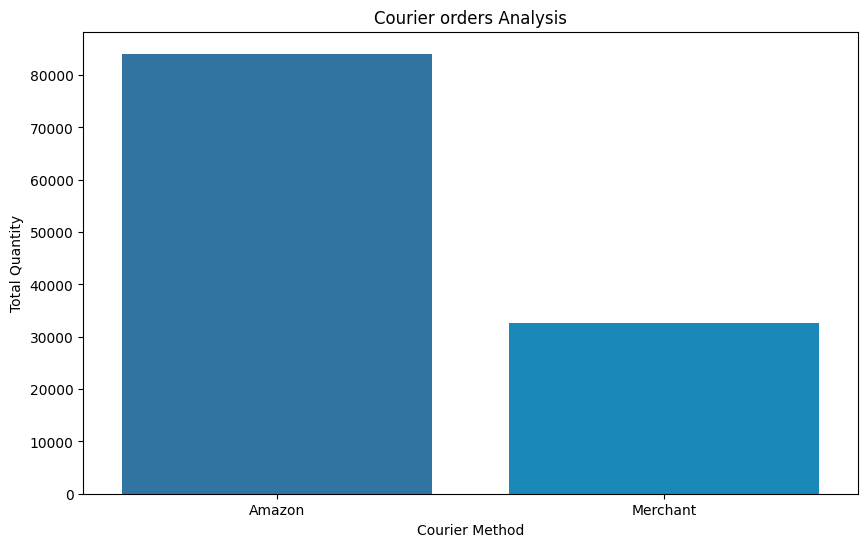

In [94]:
fulfillment_method = df1.groupby('fulfilment')['qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_method.index, y=fulfillment_method.values, palette= custom_palette)
plt.title('Courier orders Analysis')
plt.xlabel('Courier Method')
plt.ylabel('Total Quantity')
plt.show()

In [127]:
Orders_status = df1.groupby(['fulfilment','status'])['qty'].sum().sort_values(ascending=False)
print("Orders_status:")
print(Orders_status)

Orders_status:
fulfilment  status         
Amazon      Shipped            78017
Merchant    Shipped            29898
Amazon      Cancelled           5657
Merchant    Returned            2132
            Pending              527
Amazon      Pending              413
Merchant    Lost in Transit        5
Amazon      Lost in Transit        0
            Returned               0
Merchant    Cancelled              0
Name: qty, dtype: int64


In [ ]:
#2. Likelihood of Orders to be Canceled in Different Categories

In [91]:

total_quantity_more_than_1 = df1[df1['qty'] > 1].shape[0]
total_transactions = df1.shape[0]
likelihood = total_quantity_more_than_1 / total_transactions


print(f"The likelihood of a client buying an item with quantity more than 1 is: {likelihood:.2%}")

The likelihood of a client buying an item with quantity more than 1 is: 0.30%


### Business to business / Customer Lifetime Value (CLV)

In [ ]:
#1.How many orders are made by B2B?


In [102]:

Total_orders_by_b2b = df1.groupby('b2b')['qty'].sum().sort_values(ascending=False)
print(Total_orders_by_b2b )

b2b
customer    115809
business       840
Name: qty, dtype: int64


In [105]:
total_orders=df1['qty'].sum()
print(total_orders)

116649


In [106]:
percentaje_of_totalOrders_byB2B=(840/116649)*100
print (percentaje_of_totalOrders_byB2B)

0.7201090450839698


In [ ]:
# 2.What is the average transaction amount per B2B customer?

In [110]:
# Filtering the dataset for B2B transactions
b2b_df1 = df1[df1['b2b'] == 'business']

# Calculating the average transaction amount per B2B customer
average_transaction_amount = b2b_df1.groupby('order id') ['amount'].mean().reset_index() 
average_transaction_amount.columns = ['order id', 'average_transaction_amount']

# Calculating the frequency of repeat purchases per B2B customer
purchase_frequency = b2b_df1.groupby('order id').size().reset_index() 
purchase_frequency.columns = ['order id', 'purchase_frequency']

# Merging the average transaction amount and purchase frequency dataframes on 'order id'
clv_df1 = pd.merge(average_transaction_amount, purchase_frequency, on='order id')

# Calculating CLV by multiplying the average transaction amount by the purchase frequency
clv_df1['CLV'] = clv_df1['average_transaction_amount'] * clv_df1['purchase_frequency']

print(clv_df1.head())

              order id  average_transaction_amount  purchase_frequency     CLV
0  171-0013919-1772325                      5.1435                   1  5.1435
1  171-0022483-5361108                      6.5786                   1  6.5786
2  171-0042571-2926720                      4.4704                   1  4.4704
3  171-0064169-5023569                      9.7917                   1  9.7917
4  171-0085140-6937160                      6.2865                   1  6.2865


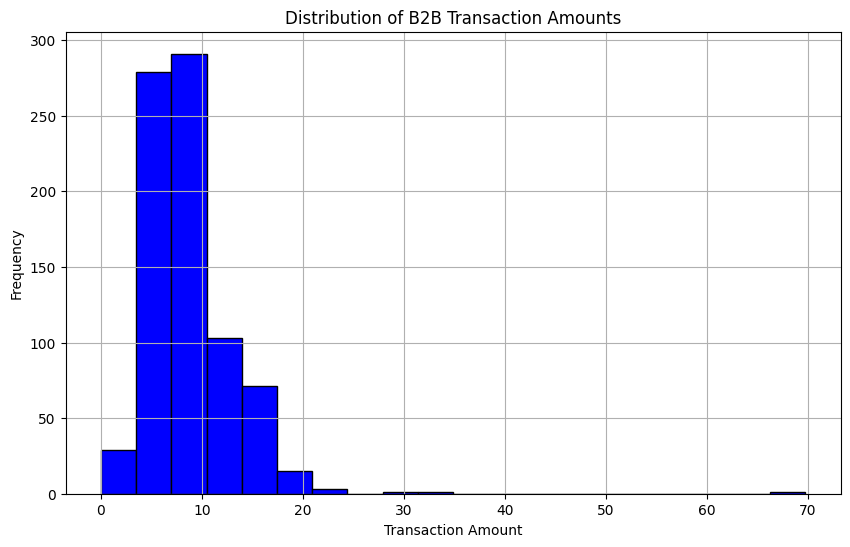

In [112]:
# Converting 'average_transaction_amount' to a list for plotting
transaction_amounts = clv_df1['average_transaction_amount'].tolist()

# Creating a histogram of average transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(transaction_amounts, bins=20, color= 'blue',
edgecolor='black')
plt.title('Distribution of B2B Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

####
The distribution of B2B transaction amounts is right-skewed, meaning most of the transaction amounts are situated 
in the average amount but few transactions amounts are very hight amounts.



### Location/ Customer segmentation

In [113]:
# 1. Identify the total Sales by State amount


Salesby_State = df1.groupby('ship_state') ['amount'].sum().sort_values(ascending=False)
print(Salesby_State)

ship_state
MAHARASHTRA           169361.283578
KARNATAKA             133110.152499
TELANGANA              87841.018755
UTTAR PRADESH          86571.354416
TAMIL NADU             85180.504645
NEW DELHI              55797.734607
KERALA                 48643.890266
WEST BENGAL            44550.081588
ANDHRA PRADESH         40891.862844
HARYANA                36602.580973
GUJARAT                34653.878114
RAJASTHAN              22366.365732
MADHYA PRADESH         20223.263846
BIHAR                  17978.289164
ODISHA                 17606.929353
PUNJAB                 15388.168868
ASSAM                  12930.329740
UTTARAKHAND            12371.623085
JHARKHAND              11672.420267
GOA                     8098.610295
CHHATTISGARH            7245.170041
HIMACHAL PRADESH        6392.729277
JAMMU & KASHMIR         5803.045798
MANIPUR                 2717.571273
CHANDIGARH              2689.106509
ANDAMAN & NICOBAR       2015.789974
NAGALAND                1842.207009
SIKKIM           

In [115]:

Salesby_city = df1.groupby('ship_city') ['amount'].sum().sort_values(ascending=False)
print(Salesby_city)

ship_city
BANGALORE                                  102877.990205
HYDERABAD                                   71195.569445
MUMBAI                                      54930.396743
NEW DELHI                                   50307.425166
CHENNAI                                     45852.549138
                                               ...      
DHARAMJAIGARH                                   0.000000
MATHABHANGA                                     0.000000
ATTUR, SALEM                                    0.000000
CHEGANNUR                                       0.000000
CHANNANKARA THIRUVANANTHAPURAM DISTRICT         0.000000
Name: amount, Length: 7084, dtype: float64


In [114]:
total_amount=df1['amount'].sum()
print(total_amount)

998127.0144099998


In [ ]:
# 2. Top States 3 with Highest Sales

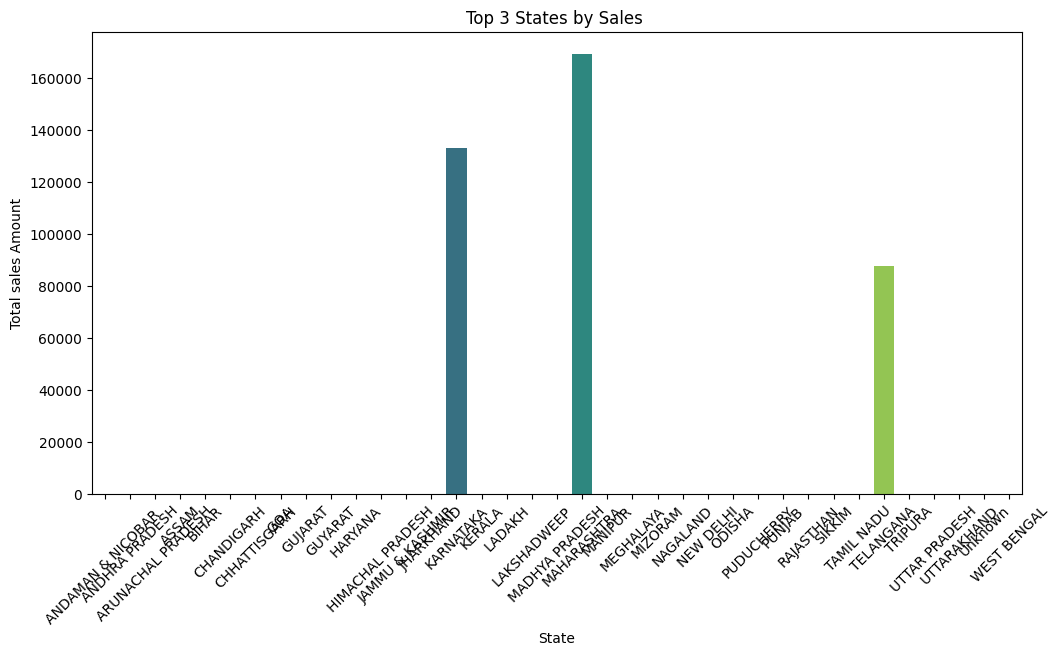

In [121]:
# Calculating the total sales amount per state

Salesby_State = df1.groupby('ship_state') ['amount'].sum().sort_values(ascending=False)


# Select the top 3 states
top_3_states = Salesby_State.head(3)

# Filter out states with zero sales
top_3_states = top_3_states[top_3_states.values > 0]


# Plotting the sales by state for the top 3 states

plt.figure(figsize=(12, 6))
sns.barplot(x=top_3_states.index, y=top_3_states.values, palette='viridis')
plt.title('Top 3 States by Sales ')
plt.xlabel('State')
plt.ylabel('Total sales Amount')
plt.xticks(rotation=45)
plt.show()

In [122]:

# 3. Is there any correlation between States with the quantity sold and total sales amount ?

# calculating the correlation 

correlation_quantity_states = df1.groupby('ship_state')['qty'].sum().corr(df1.groupby('ship_state')['amount'].sum())

print(f"Correlation between quantity sold and total sales amount by state: {correlation_quantity_states}")

Correlation between quantity sold and total sales amount by state: 0.9991767209462983


##
The result indicates a strong positive correlation of 0.999, suggesting a significant and positive relationship 
between the state in which the sale occurs and the quantity of sales generated. In other words, almost all 
variability in one variable can be explained by the other variable, indicating a strong association between the 
state and the quantity of sales.

### Customer Segmentation

###
To categorize customers based on their buying patterns and demographic information utilizing the available dataset 
columns, we must identify variables that can serve as indicators for customer demographics and purchasing behavior.
Given that we lack explicit data on customer demographics such as age or income, we will utilize geographical details
(ship_city & ship_state ), order quantity (qty), and order value (amount) as the foundations for our segmentation.

In [124]:
# Grouping data by 'ship_country' and summarizing the total 'amount' 
State_sales = df1.groupby('ship_state') ['amount'].sum().sort_values(ascending=False)

# Defining high volume and high value thresholds 

high_volume_threshold = df1['qty'].quantile(0.75) # Top 25% of quantities ordered
high_value_threshold = df1['amount'].quantile(0.75) # Top 25% of order amounts

# Creating new columns for high volume and high value
df1['high_volume'] = df1['qty'] >= high_volume_threshold
df1['high_value'] = df1['amount'] >= high_value_threshold

# Analyzing high volume vs. low volume segments
volume_segmentation = df1.groupby('high_volume')['amount'].mean() # Analyzing high value vs. low value segments
value_segmentation = df1.groupby('high_value')['qty'].mean()

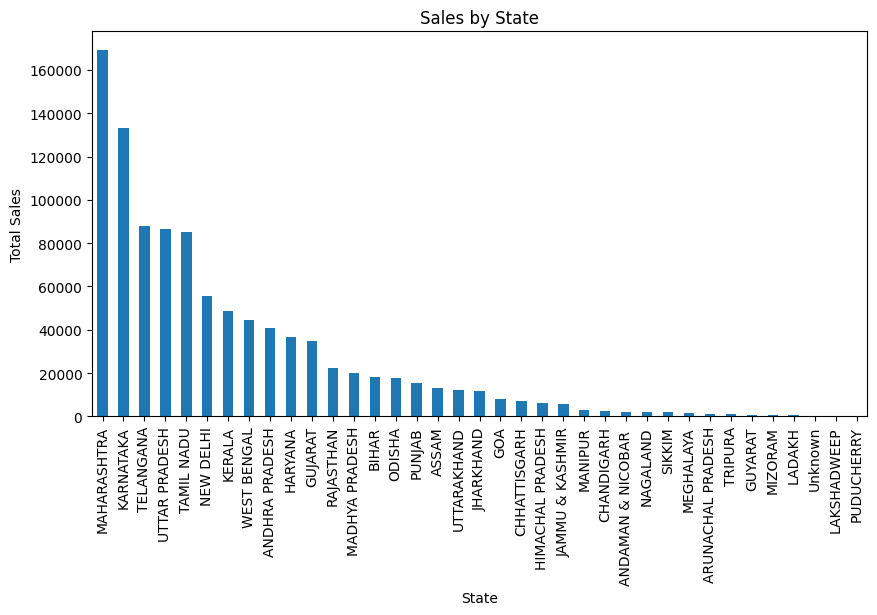

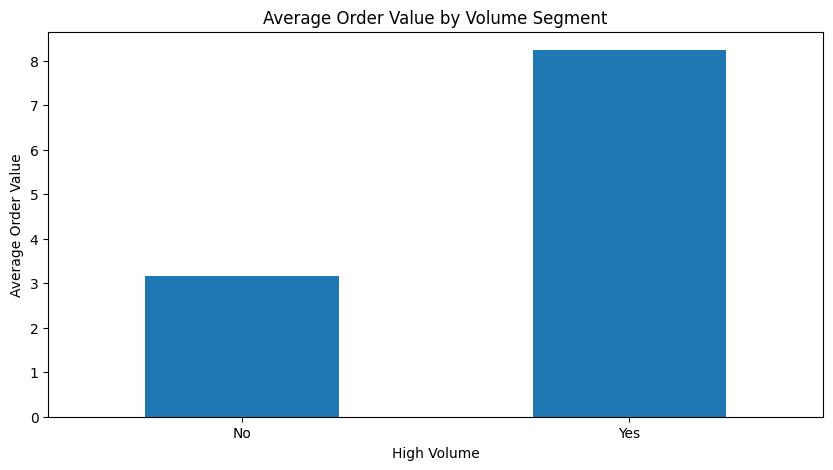

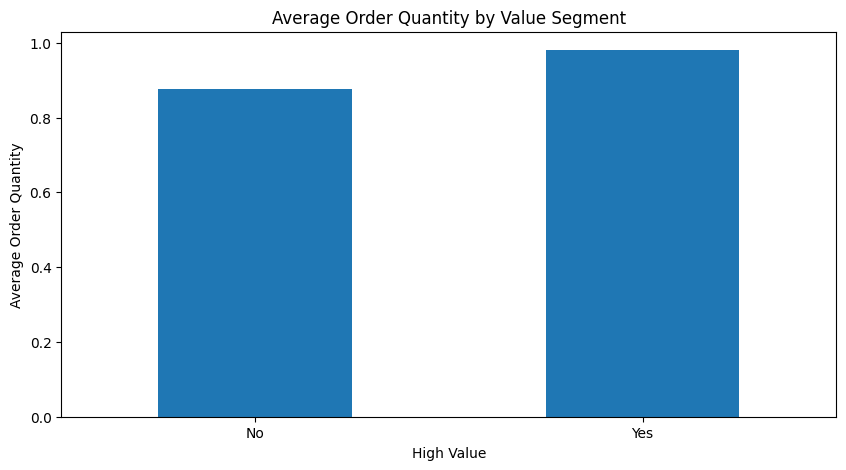

In [125]:
# Visualizing the segmentation

plt.figure(figsize=(10, 5))
State_sales.plot(kind='bar', title='Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()
plt.figure(figsize=(10, 5))
volume_segmentation.plot(kind='bar', title='Average Order Value by Volume Segment')
plt.xlabel('High Volume')
plt.ylabel('Average Order Value')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()
plt.figure(figsize=(10, 5))
value_segmentation.plot(kind='bar', title='Average Order Quantity by Value Segment')
plt.xlabel('High Value')
plt.ylabel('Average Order Quantity')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


###

##### Sales by States
The sales by states indicates the top 5 states of sales in India. These are :MAHARASHTRA,KARNATAKA,
TELANGANA , TELANGANA  & TAMIL NADU. 

#### Average Order Value by Volume Segment

High Volume vs. Low Volume Segment:

"No": Represents orders that fall below the high volume threshold.
"Yes": Represents orders that meet or exceed the high volume threshold.
    
On average, orders categorized as "Yes" (high volume) have a higher average order value compared to 
orders categorized as "No" (low volume).

Interpretation: the distinction between "No" and "Yes" suggests that there may be a positive correlation between 
order volume and average order value. In other words, as the volume of items in an order increases, the average order 
value tends to be higher.

Business Implications: for businesses, this observation could indicate an opportunity to encourage higher-volume 
purchases or to tailor marketing strategies to customers who frequently place larger orders.


#### Average Order quantity by Value Segment 

On average, there is not a substantial difference in the average order quantity between orders categorized 
as "No" (low value) and "Yes" (high value).

Interpretation: the similarity in average order quantity between "No" and "Yes" suggests that the value of the items
in an order may not have a significant impact on the average quantity of items ordered. The value of orders may be more
influenced by the type  or price of the products rather than the quantity. 

Business Implications: for businesses, this observation could imply that customers, regardless of the value of items 
in an order, tend to purchase a similar quantity of items on average.

### Revenue

In [128]:
# 1. How many items(qty) were sold per month?

#grouping by month_year and sum the quantity within each_month


Quantity_sold_per_month = df1.groupby('month_year')['qty'].sum().sort_values(ascending=False)
print(Quantity_sold_per_month)

month_year
2022-04    44206
2022-05    38011
2022-06    34276
2022-03      156
Freq: M, Name: qty, dtype: int64


In [129]:
# 2. How much did amazon earn per  month / monthly sales distribution ?

#grouping by month_year and sum the amount within each_month

Amount_earn_per_month = df1.groupby('month_year')['amount'].sum().sort_values(ascending=False)
print(Amount_earn_per_month)

month_year
2022-04    366251.595664
2022-05    333076.254725
2022-06    297507.779126
2022-03      1291.384895
Freq: M, Name: amount, dtype: float64


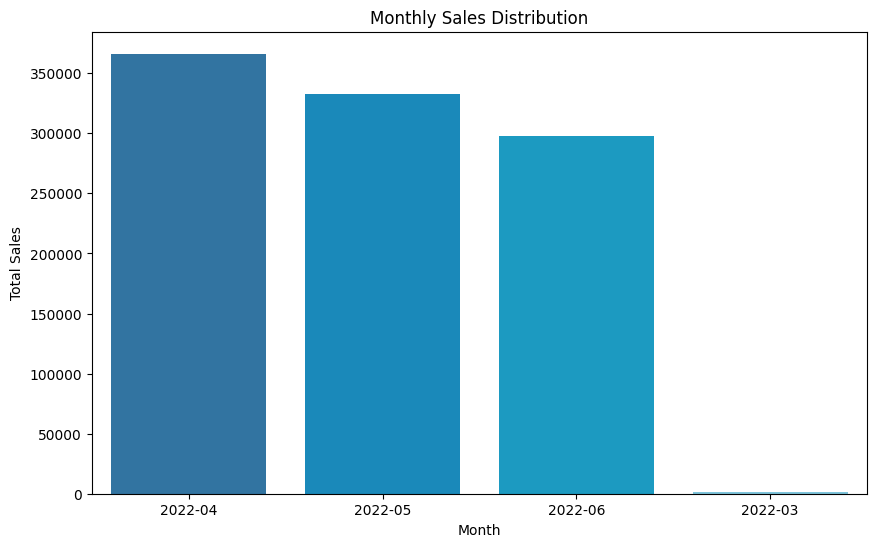

In [130]:
 # monthly sales distribution
    
plt.figure(figsize=(10, 6))
sns.barplot(x=Amount_earn_per_month.index, y=Amount_earn_per_month.values, palette= custom_palette)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [132]:
# 3. Identify the overall Sales Performance

#Average Quantity of items sold per order 

Average_qty_sold_per_order= df1.groupby('order id') ['qty'].mean()
print(Average_qty_sold_per_order)


order id
171-0000547-8192359    1.0
171-0000902-4490745    1.0
171-0001409-6228339    1.0
171-0003082-5110755    1.0
171-0003738-2052324    1.0
                      ... 
S02-9578181-3610412    1.0
S02-9599483-2736812    1.0
S02-9649067-3246849    1.0
S02-9736323-0094708    1.0
S02-9878098-5959538    1.0
Name: qty, Length: 120378, dtype: float64


In [133]:
#Average revenue (amount) per order 

Average_revenue_per_order= df1.groupby('order id') ['amount'].mean()
print(Average_revenue_per_order)


order id
171-0000547-8192359    3.8227
171-0000902-4490745    6.9088
171-0001409-6228339    5.3594
171-0003082-5110755    7.1501
171-0003738-2052324    4.8133
                        ...  
S02-9578181-3610412    0.0000
S02-9599483-2736812    0.0000
S02-9649067-3246849    0.0000
S02-9736323-0094708    0.0000
S02-9878098-5959538    0.0000
Name: amount, Length: 120378, dtype: float64


In [84]:
#4. What is the distribution of transaction_amount?

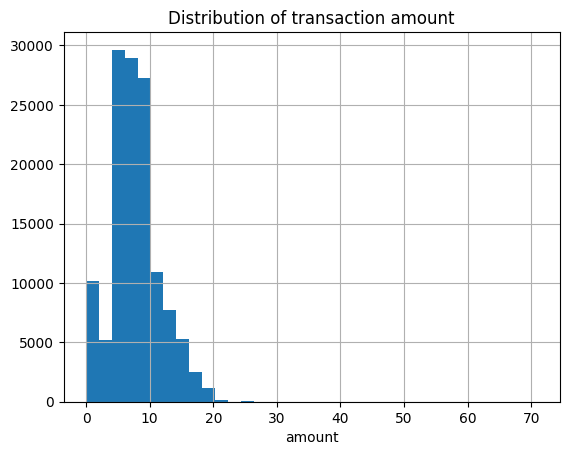

In [87]:
# Create a histogram of transaction_amount
df1.hist('amount', bins=35);
plt.title('Distribution of transaction amount');
plt.xlabel('amount');

In [88]:

average_transaction_amount = df1['amount'].mean()
print(average_transaction_amount)

7.738918506764875


#####

The transaction amount is between 3 and 9 dollars.  Recalling the average transaction amount, the result this makes sense. The average transaction amount was 7.73 $. There are higher number of transactions with lower amounts and fewer transactions with higher amount. So this distribution is right-skewed because  of its longer right tail. This could be because of the type of product or category.

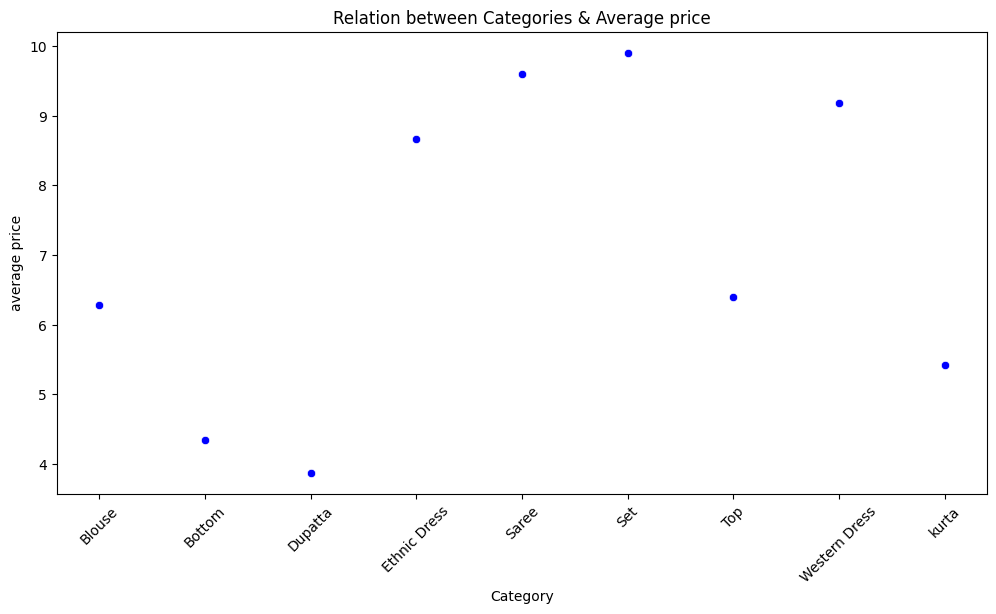

In [90]:
 # Let's confirm if the last argument is valid with a dispersion graph

# Calculating average price per category

average_transaction_per_category = df1.groupby('category')['amount'].mean().sort_values(ascending=False)

# Create a scatter chart to display the relationship between categories and average prices

plt.figure(figsize=(12, 6))
sns.scatterplot(x=average_transaction_per_category.index, y=average_transaction_per_category.values, color='blue')
plt.title('Relation between Categories & Average price')
plt.xlabel('Category')
plt.ylabel('average price')
plt.xticks(rotation=45)
plt.show()

#### 
We can observe that the points are more concentrated in the center and then decrease to the right, 
this would support the observation that some categories have higher transactions_amounts, which contributes to a right-skewed in the distribution of transaction amount.

In [134]:
#7. What is the average transaction amount by Segment (Customer)?

# Filtering the dataset for customer transactions
customer_df1 = df1[df1['b2b'] == 'customer']

# Calculating the average transaction amount per  customer
average_transaction_amount = customer_df1.groupby('order id') ['amount'].mean().reset_index() 
average_transaction_amount.columns = ['order id', 'average_transaction_amount']


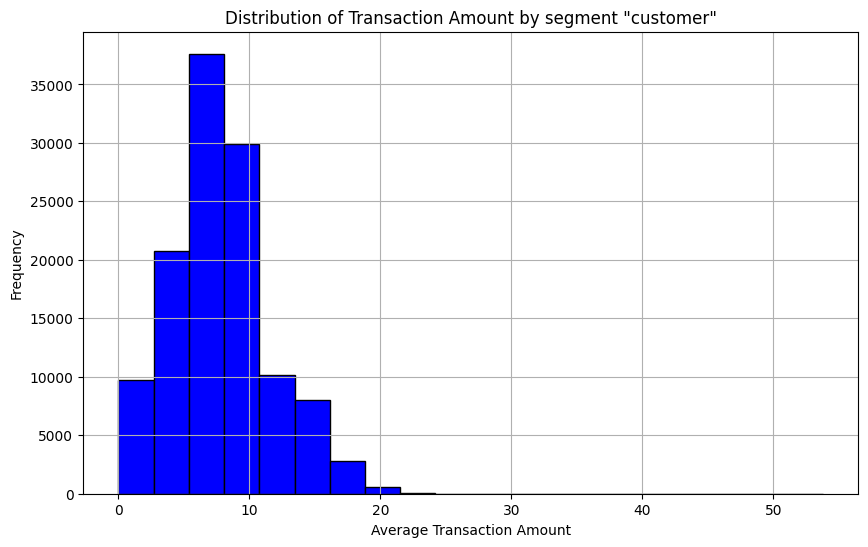

In [137]:

# Converting 'average_transaction_amount' to a list for plotting
transaction_amounts = average_transaction_amount['average_transaction_amount'].tolist()

# Creating a histogram of average transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(transaction_amounts, bins=20, color= 'blue',
edgecolor='black')
plt.title('Distribution of Transaction Amount by segment "customer"' )
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


###
The result is a right-skewed distribution and we can notice a decrease starting at $10 in the histogram
this suggests that the majority of transactions have lower average amounts, with a few transactions having 
significantly higher average amounts.


Right-Skewed Distribution: the longer tail is on the right side, indicating that there are relatively few instances 
of high average transaction amounts. Most transactions cluster toward the lower end of the average transaction amount spectrum.

Decrease Starting at $10: the decrease starting at 10 could indicate a point where a substantial number of transactions have lower average amounts, and there are fewer transactions with higher amounts.

Conclusion: the distribution suggests that the majority of customers tend to have lower average transaction amounts,
but there is a group of customers with higher average amounts that contribute to the right-skewed nature of 
the distribution

In [139]:

# 6. Analyze the correlation between the price of the product and the quantity sold.

correlation_quantity_amount = df1['amount'].corr(df1['qty']) 

print(f"Correlation between amount and quantity sold: {correlation_quantity_amount}")


Correlation between amount and quantity sold: 0.3910959468423118


###
A correlation of 0.39 is considered moderate. It suggests that there is a discernible tendency for the two variables
to move together, but the relationship is not extremely strong.However, this is not correct because the column amount 
is not the price of the product. The 'amount' column represents the total sales amount for an order and can include 
multiple items (it is true that the average of item sold is 1), it might not accurately reflect the price of a single product.

In such cases, when analyzing the correlation between the quantity sold ('qty') and the total sales amount ('amount'),
it's essential to consider the potential bias introduced by orders with multiple items. 
The 'amount' column would then represent the total revenue from an order, which might not directly correlate with
the price of a single product.


In [140]:
##Lets investigate the correlation between the quantity sold per category and the total sales per category


correlation_category_quantity = df1.groupby('category')['qty'].sum().corr(df1.groupby('category')['amount'].sum())

print(f"Correlation between category  and total sales amount by category: {correlation_category_quantity}")

Correlation between category  and total sales amount by category: 0.9426809161129939


###

The correlation coefficient of 0.94 indicate a very strong positive relationship between the total quantity sold and
the total sales amount for each category.

As the quantity of products sold in a category increases, there is a substantial increase in the total sales amount 
for that category.

A high positive correlation could be expected, especially if there are consistent pricing structures within each
category and the majority of orders involve a single item.
